In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.linalg import solve
import networkx as nx

# Задача:
Дана однородная Марковская цепь с данным числом состояний {$S_1$, $S_2$, $...$, $S_m$}. Ненулевые переходные вероятности $p_{ij}$, $i \neq j$, заданы ниже.


---


Число состояний Марковской цепи: $m = 5$\
Переходные вероятности: $p_{12} = 0.1$, $p_{23} = 0.2$, $p_{21} = 0.1$, $p_{34} = 0.3$, $p_{45} = 0.4$, $p_{51} = 0.5$\
Шаги: $k = 25$\
Траектории: $n = 100$


---


**Задание:**
1. Выпишите матрицу переходных вероятностей;
2. Изобразите размеченный граф Марковской цепи;
3. Докажите, что цепь эргодическая;
4. Смоделируйте вектор начальных вероятностей $p(0)$ согласно приложенному алгоритму;
5. Вычислите безусловные вероятности состояний смоделированной цепи на $k$-ом шаге по формуле из *лекции 1* для полученного $p(0)$;
6. Смоделируйте $n$ траекторий полученной цепи за $k$ шагов. Несколько траекторий выведите на печать;
7. По полученным реализациям траекторий найдите вектор эмперических безусловных вероятностей состояний цепи на $k$-ом шаге;
8. Сравните найденные эмперические вероятности с теоретическими для $k$-ого шага;
9. Вычислите финальные вероятности для рассматриваемой Марковской цепи (*лекция 2*) и сравните их с вероятностями состояний на $k$-ом шаге;
10. Сформулируйте выводы.

In [ ]:
m = 5
k = 25
n = 100

# 1
Выпишем матрицу переходных состояний:
> 
$
P = \begin{bmatrix}
0.9 & 0.1 & 0 & 0 & 0 \\
0.1 & 0.7 & 0.2 & 0 & 0 \\
0 & 0 & 0.7 & 0.3 & 0 \\
0 & 0 & 0 & 0.6 & 0.4 \\
0.5 & 0 & 0 & 0 & 0.5
\end{bmatrix}
$



In [ ]:
P = np.array([[0.9, 0.1, 0, 0, 0],
     [0.1, 0.7, 0.2, 0, 0],
     [0, 0, 0.7, 0.3, 0],
     [0, 0, 0, 0.6, 0.4],
     [0.5, 0, 0, 0, 0.5]])

#2
Изобразим размеченный граф Марковской цепи:
>
# 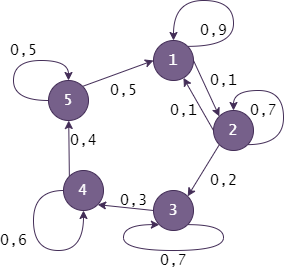

#3
>
Марковская цепь является эргодической, если существует $\lim\limits_{n \to \infty} p_{ij}^{(n)} = \pi_j, 0<\pi_j<1, \sum\limits_j \pi_j=1$.

In [ ]:
P_2 = np.linalg.matrix_power(P, 2)
print("n = 2:\n", P_2)
P_3 = np.linalg.matrix_power(P, 3)
print("\nn = 3:\n", P_3)
P_500 = np.linalg.matrix_power(P, 500)
print("\nn = 500:\n", P_500)
P_1000 = np.linalg.matrix_power(P, 1000)
print("\nn = 1000:\n", P_1000)

n = 2:
 [[0.82 0.16 0.02 0.   0.  ]
 [0.16 0.5  0.28 0.06 0.  ]
 [0.   0.   0.49 0.39 0.12]
 [0.2  0.   0.   0.36 0.44]
 [0.7  0.05 0.   0.   0.25]]

n = 3:
 [[0.754 0.194 0.046 0.006 0.   ]
 [0.194 0.366 0.296 0.12  0.024]
 [0.06  0.    0.343 0.381 0.216]
 [0.4   0.02  0.    0.216 0.364]
 [0.76  0.105 0.01  0.    0.125]]

n = 500:
 [[0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]]

n = 1000:
 [[0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]
 [0.53892216 0.17964072 0.11976048 0.08982036 0.07185629]]


Следовательно, существует $\lim\limits_{n \to \infty} p_{ij}^{(n)} = \pi_j, 0<\pi_j<1$.

In [ ]:
print(np.sum(P_1000[0]).round(5))

1.0


Следовательно, $\sum\limits_j \pi_j=1$.
Таким образом, Марковская цепь является эргодической.

#4
**Моделируем вектор начальных состояний $p(0)$.
Для этого:**


*   Генерируем вектор $\vec{r}=(r_1, r_2, ..., r_{m - 1})$ из независимых и равномерно распределённых на отрезке $[0, 1]$ случайных величин



In [ ]:
r = np.random.uniform(0, 1, m - 1)
print(r)

[0.3770199  0.7992701  0.64399013 0.64306595]




*   Строим вариационный ряд $\vec{r_{()}} = (r_{i_1}, r_{i_2}, ..., r_{i_{m-1}})$, т.е. упорядочиваем по возрастанию.


In [ ]:
var_r = sorted(r)
for i in var_r:
  print(i)

0.3770199012947605
0.6430659498269742
0.6439901308408129
0.7992701019159666


*   Находим длины отрезков, на которые вектор $\vec{r_{()}}$ разбивает отрезок $[0, 1]$ $-$ получаем вектор начальных вероятностей $\vec{p} = (r_{i_1}, r_{i_2} - r_{i_1}, ..., 1 - r_{i_{m - 1}}) = p(0)^T$

In [ ]:
lengths = []
lengths.append(var_r[0])
for i in range(1, m - 1):
    length = var_r[i] - var_r[i - 1]
    lengths.append(length)
lengths.append(1 - var_r[m - 2])
print("Длины отрезков:")
for i in lengths:
  print(i)
print("Сумма этих длин:\n", sum(lengths))

Длины отрезков:
0.3770199012947605
0.2660460485322137
0.0009241810138387319
0.15527997107515368
0.2007298980840334
Сумма этих длин:
 1.0


#5
Вычисляем безусловные вероятности состояний смоделированной цепи на  $k$ -ом шаге для полученного $p(0)$:

In [ ]:
k_i = rd.randint(0, 25)
P_k = np.linalg.matrix_power(P, k_i)
p_0 = lengths
total = np.dot(p_0, P_k)
print(total)
print(round(sum(total), 5))

[0.53913211 0.17952386 0.1196105  0.08977836 0.07195517]
1.0


#6
Моделируем $n$ траекторий полученной цепи за $k$ шагов. Для этого:


*   Генерируем равномерно распределённую на $[0, 1]$ случайную величину $r_0$ и по вектору $p(0)$ разыгрываем начальное состояние следующим образом: если $r_0 \leq r_{i_1}$, то полагаем $\xi_0 = S_1$, если $r_{i_1} < r_0 \leq r_{i_2}$, то полагаем $\xi_0 = S_2$ и т.д. Пусть $\xi_0 = S_{j_0}$.

*   Генерируем ещё одно значение $r_1$ и по строке с номером $j_0$ матрицы $P$ аналогично предыдущему пункту разыгрываем значение $\xi_1 = S_{j_1}$.

*   Повторяем алгоритм заданное число $k$ раз. Получаем выборочную траекторию цепи: $S_{j_0}, S_{j_1}, ..., S_{j_k}$.
*   Повторяем процедуру $1) - 3)$ заданное число $n$ раз.

In [ ]:
def stp_0(r0):
  if (r0 <= var_r[0]): return 1
  if (var_r[0] < r0 <= var_r[1]): return 2
  if (var_r[1] < r0 <= var_r[2]): return 3
  if (var_r[2] < r0 <= var_r[3]): return 4
  if (r0 > var_r[3]): return 5

def stp_1(r1, num):
  num -= 1
  if num == 0:
    if (r1 <= 0.1): return 2
    else: return 1
  if num == 1:
    if (r1 <= 0.1): return 1
    if (0.1 < r1 <= 0.3): return 3
    else: return 2
  if num == 2:
    if (r1 <= 0.3): return 4
    else: return 3
  if num == 3: 
    if (r1 <= 0.4): return 5
    else: return 4
  if num == 4:
    if (r1 <= 0.5): return 1
    else: return 5

tracks = []
for i in range(n):
  track = []
  r_0 = rd.random()
  first = stp_0(r_0)
  track.append(first)
  nu = first
  for j in range(k):
    r_ = rd.random()
    tmp = stp_1(r_, nu)
    track.append(tmp)
    nu = tmp
  tracks.append(track)

Напечатаем несколько траекторий:

In [ ]:
print("1-я траектория: ", tracks[0][0:13])
print("                ", tracks[0][13::])
print("50-я траектория: ", tracks[n // 2][0:13])
print("                 ", tracks[n // 2][13::])
print("100-я траектория: ", tracks[n - 1][0:13])
print("                  ", tracks[n - 1][13::])
print("Случайная траектория ", tracks[rd.randint(0, 100)][0:13])
print("                     ", tracks[rd.randint(0, 100)][13::])

1-я траектория:  [2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]
                 [5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
50-я траектория:  [1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1]
                  [1, 1, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 1]
100-я траектория:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]
                   [3, 3, 3, 3, 3, 4, 5, 1, 1, 1, 2, 3, 3]
Случайная траектория  [2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5]
                      [4, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#7
По полученным реализациям траекторий найдём вектор эмпирических безусловных вероятностей состояний цепи на $k$-ом шаге. Для этого подсчитываем число $n_j$ смоделированных траекторий, находящихся в состоянии $S_j$ на $k$-ом шаге и делим на общее число траекторий $n$. Получаем вектор $\hat{p}(k)$ и сравниваем его с $p(k)$.

In [ ]:
sost = [0] * m
for i in range(n):
  if tracks[i][k_i] == 1:
    sost[0] += 1
  elif tracks[i][k_i] == 2:
    sost[1] += 1
  elif tracks[i][k_i] == 3:
    sost[2] += 1
  elif tracks[i][k_i] == 4:
    sost[3] += 1
  elif tracks[i][k_i] == 5:
    sost[4] += 1

In [ ]:
print("Число траекторий,\nнаходящихся в каждом состоянии\nна случайном k-ом шаге:\n", sost)

Число траекторий,
находящихся в каждом состоянии
на случайном k-ом шаге:
 [65, 15, 6, 8, 6]


In [ ]:
p_k_ = [x / n for x in sost]

In [ ]:
print("Вектор эмпирических безусловных вероятностей\nсостояний цепи на случайном k-ом шаге:\n", p_k_)
print("Проверка, сумма вероятностей равна: ", round(sum(p_k_), 5))

Вектор эмпирических безусловных вероятностей
состояний цепи на случайном k-ом шаге:
 [0.65, 0.15, 0.06, 0.08, 0.06]
Проверка, сумма вероятностей равна:  1.0


#8
Теперь сравним $\hat{p}(k)$ с $p(k)$:

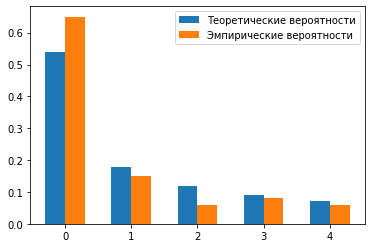

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

x = np.arange(5)
y1 = total
y2 = p_k_
w = 0.3
ax.bar(x - w/2, y1, width=w, label = "Теоретические вероятности")
ax.bar(x + w/2, y2, width=w, label = "Эмпирические вероятности")
ax.legend()
plt.show()

#9
Вычислим финальные вероятности для рассматриваемой Марковской цепи и сравним их с вероятностями состояний на $k$-ом шаге:


*   Транспонируем матрицу переходных состояний:
> 
$
P^T = \begin{bmatrix}
0.9 & 0.1 & 0 & 0 & 0.5 \\
0.1 & 0.7 & 0 & 0 & 0 \\
0 & 0.2 & 0.7 & 0 & 0 \\
0 & 0 & 0.3 & 0.6 & 0 \\
0 & 0 & 0 & 0.4 & 0.5
\end{bmatrix}
$

*    Составляем СЛАУ, добавляя балансное уравнение:
$\pi_1+\pi_2+\pi_3+\pi_4+\pi_5=1$

Получаем:
\begin{equation*}
 \begin{cases}
   0.9\pi_1+0.1\pi_2+0.5\pi_5=\pi_1,
   \\
   0.1\pi_1+0.7\pi_2=\pi_2,
   \\
   0.2\pi_2+0.7\pi_3=\pi_3,
   \\
   0.3\pi_3+0.6\pi_4=\pi_4,
   \\
   0.4\pi_4+0.5\pi_5=\pi_5,
   \\
   \pi_1+\pi_2+\pi_3+\pi_4+\pi_5=1
 \end{cases}
\end{equation*}



In [ ]:
SLAU = np.array([[-0.1, 0.1, 0, 0, 0.5],
                 [0.1, -0.3, 0, 0, 0],
                 [0, 0.2, -0.3, 0, 0],
                 [0, 0, 0.3, -0.4, 0],
                 [1, 1, 1, 1, 1]])
slau = np.array([0, 0, 0, 0, 1]).reshape((5, 1))
total_1 = solve(SLAU, slau)
total_1 = total.transpose()
print(total_1)
print(round(sum(total_1), 5))

[0.53913211 0.17952386 0.1196105  0.08977836 0.07195517]
1.0


**Получаем финальные вероятности:**
>
{$0.53892216, 0.17964072, 0.11976048, 0.08982036, 0.07185629$}

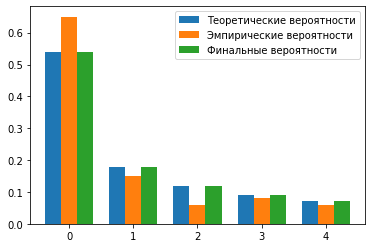

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

x = np.arange(5)
y1 = total
y2 = p_k_
y3 = total_1
w = 0.25
ax.bar(x - w, y1, width=w, label = "Теоретические вероятности")
ax.bar(x, y2, width=w, label = "Эмпирические вероятности")
ax.bar(x + w, y3, width=w, label = "Финальные вероятности")
ax.legend()
plt.show()

#Выводы:
В ходе работы мной были выполнены все шаги обработки входных данных, таким образом получены: матрица переходных вероятностей, размеченный граф Марковской цепи, смоделированный вектор начальных вероятностей $p(0)$, безусловные вероятности состояний смоделированной цепи на $k$-ом шаге для полученного $p(0)$, смоделированные $n$ траекторий полученной цепи за $k$ шагов, вектор эмпирических безусловных вероятностей состояний цепи на $k$-ом шаге, графическое сравнение эмпирических вероятностей с теоретическими для $k$-ого шага, финальные вероятности, а так же их графическое сравнение с теоретическими вероятностями на $k$-ом шаге и с эмпирическими вероятностями на $k$-ом шаге. По первой диаграмме видно, что эмпирические вероятности в целом распределены как и теоретические, этот факт воспроизводится с каждой новой генерацией случайных величин. По второй диаграмме видно, что теоретические вероятности на $k$-ом шаге равны финальным вероятностям на $k$-ом шаге.

---



Далее следуют попытки что-то себе доказать:

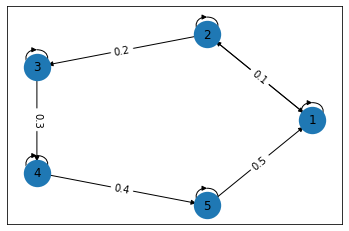

In [ ]:
nodes = []
G = nx.DiGraph()
G.add_nodes_from(nodes)

for i in range(m):
  nodes.append(i + 1)
for i in range(m):
  for j in range(m):
    if P[i][j] != 0:
      G.add_edge(i + 1, j + 1, weight=P[i][j])

pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=500, arrows=True, linewidths=5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
 
plt.show()
